# ERNIE Models Dialogue Application Demo


This tutorial demonstrates how to use the ERNIE models to implement a simple demo for dialogue application. The following two models are mainly used:
- Text-only Model: Supports text-based dialogue interactions.
- Multimodal Model: Enables mixed input of both images and text for dialogue scenarios.

## 1. Environmental Setup
Before starting, ensure your system meets these requirements:
- Python version 3.10-3.12 is installed.
- Ensure the following Python libraries are included: `openai`, `base64`
- Set the API key for the model `model_api_key`

In [ ]:
model_api_key = "api_key" # the API key for model, which can be disregarded and replaced with any arbitrary value when using the model

### 1.1. Install Dependencies

In [ ]:
!pip install openai

## 2. Text-Only Model
The text-only model is ideal for basic language tasks that involve processing text input and generating corresponding output (e.g., question-answering, summarization, translation), without requiring complex reasoning capabilities.

When using a text-only model, you need to deploy the [ERNIE-4.5](https://github.com/PaddlePaddle/FastDeploy) series model services and correctly configure the corresponding service address `ernie_45_url`.

In [ ]:
ernie_45_url = "http://localhost:port/v1"

### 2.1. Model Input
The model input consists of a message list that captures the conversational context history. Each message in the list is structured as a dictionary and includes the following fields:
- `role`: the role of the message sender, which can be:
    - `system`: System message, usually used to set the behavior of the model or initial instructions
    - `user`: User message, indicating user inputs
    - `assistant`: Model message, indicating the model's reply
- `content`: Specific text content

Text-only model input has the following characteristics:
- System Role: System prompt words can be set to define the behavior of the model
- Text-Only Dialogue: only text input and output are supported
- Multiple Rounds of Dialogue: Supporting the preservation of historical dialogue context

In [2]:
text_messages = [
    {"role": "system", "content": "你是一个智能助手"},
    {"role": "user", "content": "中国的首都是哪里？"},
    {"role": "assistant", "content": "北京"},
    {"role": "user", "content": "北京的地铁怎么样？"}
]

### 2.2. Non-Streaming Request
#### 2.2.1. Request Model
When sending a request to the API, the following main parameters need to be considered:
- `messages` (must): List of text conversation messages
- `max_tokens` (optional): configuration parameter for maximum number of generated tokens
- `temperature` (optional): configuration parameter for controlling randomness in generated results
- `top_p` (optional): configuration parameter for nucleus sampling

In [8]:
from openai import OpenAI

client = OpenAI(base_url=ernie_45_url, api_key=model_api_key)
response_text = client.chat.completions.create(
    model="default",
    messages=text_messages,
    temperature=1.0,
    max_tokens=2048,
    top_p=0.7
)
response_text = response_text.model_dump()
print(response_text)

{'id': 'chatcmpl-fde2edb1-1b0d-4a59-b0e5-3918916f6c20', 'choices': [{'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': '北京地铁的票价贵吗？\n\n北京地铁非常方便，覆盖面广，可以方便地到达城市的各个角落。票价方面，北京地铁的票价相对来说比较合理，根据乘坐的距离长短来计算票价，起步价为3元，根据行程长度进行计价，最高票价一般为10元。同时，北京地铁也提供一些优惠政策，如学生票、老年人票等，让更多人能够享受公共交通的便利。</s></s>', 'refusal': None, 'role': 'assistant', 'annotations': None, 'audio': None, 'function_call': None, 'tool_calls': None, 'reasoning_content': None}}], 'created': 1750076721, 'model': 'default', 'object': 'chat.completion', 'service_tier': None, 'system_fingerprint': None, 'usage': {'completion_tokens': 91, 'prompt_tokens': 29, 'total_tokens': 120, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}}


#### 2.2.2 Model Output
- `content`: Final answer

In [9]:
content_text = response_text["choices"][0]["message"]["content"]
print(content_text)

北京的地铁非常发达，是世界上最长的地铁系统之一。它覆盖了城市中心和远郊区域，为市民和游客提供了方便快捷的交通方式。以下是一些北京地铁的特点：

1. 线路覆盖面广：北京地铁已经开通了多条线路，覆盖了城市的主要区域，包括市中心、近郊和远郊。

2. 运营时间长：北京地铁的运营时间通常是从早上5点到晚上11点左右，具体根据不同线路有所调整。

3. 客流量大：由于北京是一个人口众多的城市，地铁客流量也非常大。在高峰时段，一些线路会非常拥挤。

4. 技术先进：北京地铁采用了先进的信号技术和自动控制系统，确保了列车的安全和准时。

5. 票价便宜：北京地铁的票价相对便宜，是根据乘坐的站数来计算的，最高票价也不会超过10元。

总的来说，北京地铁是一种非常方便、快捷、经济实惠的交通方式，为市民和游客提供了良好的出行体验。</s></s>


### 2.3. Streaming Request
#### 2.3.1. Request Model
- `messages` (must): List of conversation messages
- `max_tokens` (optional): configuration parameter for maximum number of generated tokens
- `temperature` (optional): configuration parameter for controlling randomness in generated results
- `top_p` (optional): configuration parameter for nucleus sampling
- `stream` (optional): configuration parameter for enabling/disabling streamed return

In [10]:
client = OpenAI(base_url=ernie_45_url, api_key=model_api_key)
response_text = client.chat.completions.create(
    model="default",
    messages=text_messages,
    temperature=1.0,
    max_tokens=2048,
    top_p=0.7,
    stream=True
)
response_text_stream = []
for chunk in response_text:
    if not chunk.choices:
        continue
    response_text_stream.append(chunk.model_dump())

print(response_text_stream[:3])

[{'id': 'chatcmpl-4b334e11-bb61-46fe-92e7-f3db8799ab5f', 'choices': [{'delta': {'content': '', 'function_call': None, 'refusal': None, 'role': 'assistant', 'tool_calls': None, 'reasoning_content': ''}, 'finish_reason': None, 'index': 0, 'logprobs': None}], 'created': 1750076763, 'model': 'default', 'object': 'chat.completion.chunk', 'service_tier': None, 'system_fingerprint': None, 'usage': None}, {'id': 'chatcmpl-4b334e11-bb61-46fe-92e7-f3db8799ab5f', 'choices': [{'delta': {'content': '北京', 'function_call': None, 'refusal': None, 'role': None, 'tool_calls': None, 'token_ids': [3991], 'reasoning_content': None}, 'finish_reason': None, 'index': 0, 'logprobs': None, 'arrival_time': 0.058094024658203125}], 'created': 1750076763, 'model': 'default', 'object': 'chat.completion.chunk', 'service_tier': None, 'system_fingerprint': None, 'usage': None}, {'id': 'chatcmpl-4b334e11-bb61-46fe-92e7-f3db8799ab5f', 'choices': [{'delta': {'content': '地铁', 'function_call': None, 'refusal': None, 'role':

#### 2.3.2. Model Output
The model's output will be delivered via streaming return.
- `content`: Final answer

In [12]:
content_text_stream = ""
for res in response_text_stream:
    content_text_stream += res["choices"][0]["delta"]["content"]
print(content_text_stream)

北京地铁的现状和发展情况如何？

北京地铁是一项庞大而复杂的交通系统，为北京市民和游客提供了便捷的城市交通方式。以下是一些关于北京地铁的现状和发展情况：

1. 线路覆盖范围：北京地铁目前拥有多条线路，覆盖了城市的主要区域和重要景点。不仅如此，地铁线路还在不断扩展，以满足城市发展的需求。

2. 运营情况：北京地铁每天运营时间较长，通常从早上5点到晚上11点左右，高峰期间会加强列车频次以应对乘客需求。地铁列车在繁忙时段可能会非常拥挤，但运营方也在努力提高运力和舒适度。

3. 技术创新：北京地铁引入了一些先进的技术，如智能支付系统、无线网络覆盖、安全监控系统等，以提升乘客体验和运营效率。

4. 环保可持续发展：北京地铁也在积极推动环保和可持续发展，采用节能技术、噪音控制措施等，减少对环境的影响。

5. 未来规划：北京地铁系统有进一步的扩展规划，包括新线路的建设和既有线路的改造升级，以适应城市发展和人口增长的需求。

总体来说，北京地铁在不断发展壮大，为城市居民和游客提供了便捷、高效的交通选择。</s>


## 3. Multimodal Model
The multimodal model is well-suited for cross-modal task scenarios that demand the simultaneous processing of visual and textual information, including applications such as image captioning, visual-textual question answering (VQA), and other tasks requiring comprehensive visual semantic comprehension.

When using multimodal models, you need to deploy the [ERNIE-4.5-VL](https://github.com/PaddlePaddle/FastDeploy) series model services and correctly configure the corresponding service address `ernie_45_vl_url`.

In [ ]:
ernie_45_vl_url = "http://localhost:port/v1"

### 3.1. Model Input
Multimodal model input has the following characteristics:
- System Role: System prompt words can be set to define the behavior of the model
- Multiple Rounds of Dialogue: Supporting the preservation of historical dialogue context
- Mixed Input: Supports sending pictures and text content at the same time
- Image Support: You can upload pictures through URL or local files

In [2]:
# url pictures
multi_messages_url = [
    {"role": "system", "content": "你是一个图片分析助手"},
    {"role": "user", "content": [
        {"type": "image_url", "image_url": {"url": "https://nlp-eb.cdn.bcebos.com/static/eb/asset/topLogo.4a0fc7b7"}},
        {"type": "text", "text": "请分析这张图"}
    ]}
]

When uploading local pictures, you need to use the `base64` library to convert the image file into a Base64 encoded string and splice it into a standard format of `data:image/{type};base64,{Base64 encoded string}`.

[{'role': 'system', 'content': '你是一个图片分析助手'}, {'role': 'user', 'content': [{'type': 'image_url', 'image_url': {'url': ''}}, {'type': 'text', 'text': '请分析这张图'}]}]

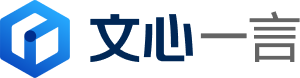

In [3]:
import base64


# Upload pictures locally
def get_image_url(image_path):
    base64_image = ""
    extension = image_path.split(".")[-1]
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    url = f"data:image/{extension};base64,{base64_image}"
    return url

test_image = "../assets/yiyan_logo.png"
image_url = get_image_url(test_image)
multi_messages_local = [
    {"role": "system", "content": "你是一个图片分析助手"},
    {"role": "user", "content": [
        {"type": "image_url", "image_url": {"url": image_url}},
        {"type": "text", "text": "请分析这张图"}
    ]}
]
print(multi_messages_local)

### 3.2. Request Model
When sending a request to the API, the following main parameters need to be considered:
- `messages` (must): a list of graphic and text dialogue messages. The pictures can be uploaded locally (`multi_messages_local`), or you can enter the URL address (`multi_messages_url`)
- `max_tokens` (optional): configuration parameter for maximum number of generated tokens
- `temperature` (optional): configuration parameter for controlling randomness in generated results
- `top_p` (optional): configuration parameter for nucleus sampling

In [11]:
from openai import OpenAI

client = OpenAI(base_url=ernie_45_vl_url, api_key=model_api_key)
response_multi = client.chat.completions.create(
    model="default",
    messages=multi_messages_local,
    temperature=1.0,
    max_tokens=2048,
    top_p=0.7
)
response_multi = response_multi.model_dump()
print(response_multi)

{'id': 'chatcmpl-a3f63b46-ab8a-4d7e-a62c-27709dfac710', 'choices': [{'finish_reason': 'stop', 'index': 0, 'logprobs': None, 'message': {'content': '这是一张“文心一言”的logo图片。\n### 图形部分\n左侧图形整体是六边形轮廓，内部有类似信息流动或智能交互的抽象图案，采用蓝色调，蓝色常给人科技、专业、理智的感觉，这与产品作为人工智能语言模型的科技属性相契合。\n### 文字部分\n右侧“文心一言”四个汉字，字体设计简洁现代，同样使用蓝色，与左侧图形在色彩上相呼应，整体视觉风格统一，突出了产品的品牌名称，便于用户识别和记忆。 \n\n该logo通过简洁的设计和具有科技感的元素，传达出产品智能化、现代化的特点。</s></s>', 'refusal': None, 'role': 'assistant', 'annotations': None, 'audio': None, 'function_call': None, 'tool_calls': None, 'reasoning_content': None}}], 'created': 1750077575, 'model': 'default', 'object': 'chat.completion', 'service_tier': None, 'system_fingerprint': None, 'usage': {'completion_tokens': 135, 'prompt_tokens': 54, 'total_tokens': 189, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}}


### 3.3. Model Output
- `content`: Final answer

In [12]:
content_multi = response_multi["choices"][0]["message"]["content"]
print(content_multi)

这是一张“文心一言”的logo图片。
### 图形部分
左侧图形整体是六边形轮廓，内部有类似信息流动或智能交互的抽象图案，采用蓝色调，蓝色常给人科技、专业、理智的感觉，这与产品作为人工智能语言模型的科技属性相契合。
### 文字部分
右侧“文心一言”四个汉字，字体设计简洁现代，同样使用蓝色，与左侧图形在色彩上相呼应，整体视觉风格统一，突出了产品的品牌名称，便于用户识别和记忆。 

该logo通过简洁的设计和具有科技感的元素，传达出产品智能化、现代化的特点。</s></s>
